# Business Context

**Breast cancer** is a significant public health concern worldwide. Early and accurate diagnosis is crucial for successful treatment and improving patient outcomes. Traditional diagnostic methods, while effective, can be time-consuming and prone to human error.

**Machine learning offers a potential solution to enhance breast cancer diagnosis**. By analyzing medical data, such as tumor characteristics, **a model can be trained to predict whether a lump is benign or malignant**. This could lead to faster, more accurate diagnoses, enabling timely interventions and potentially saving lives.

**The business impact of a successful model includes:**

* Improved patient outcomes: Earlier detection and treatment can significantly increase survival rates.
* Reduced healthcare costs: Efficient diagnosis can optimize resource allocation.
* Enhanced patient experience: Quicker diagnosis can reduce patient anxiety and improve overall satisfaction.
* Potential for new medical discoveries: Insights from the model could contribute to a deeper understanding of breast cancer.

By developing a reliable machine learning model, healthcare providers can augment their diagnostic capabilities and contribute to better patient care.

# Importing Libraries and Dataset

In [1]:
# for EDA and Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
# for preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data
! unzip breast-cancer-wisconsin-data.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 41.1MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [342]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Information about dataset provided by data source:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter
d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: **357 benign, 212 malignant**

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Features Exploratory Data Analysis

For a better result in analysis, we will drop "id" and "Unnamed:32" columns at first

In [343]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

## Uni-variate Analysis

In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [34]:
df.concavity_mean.sort_values(ascending=True).head(15)

,concavity_mean
568,0.000000
314,0.000000
538,0.000000
101,0.000000
192,0.000000
473,0.000000
557,0.000000
550,0.000000
174,0.000000
140,0.000000


In [38]:
df['concave points_mean'].sort_values(ascending=True).head(15)

,concave points_mean
568,0.000000
101,0.000000
140,0.000000
174,0.000000
175,0.000000
391,0.000000
192,0.000000
538,0.000000
314,0.000000
473,0.000000


**Notice:** the minimum values of concavity_worst and concave points_worst are zeros. so we will highlight that in Bi-variate analysis

In [31]:
for col in df.columns:
  print(f'{col}:')
  print(df[col].describe())
  print('-'*25)

diagnosis:
count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
-------------------------
radius_mean:
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64
-------------------------
texture_mean:
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64
-------------------------
perimeter_mean:
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
-------------------------
area_mean:
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      25

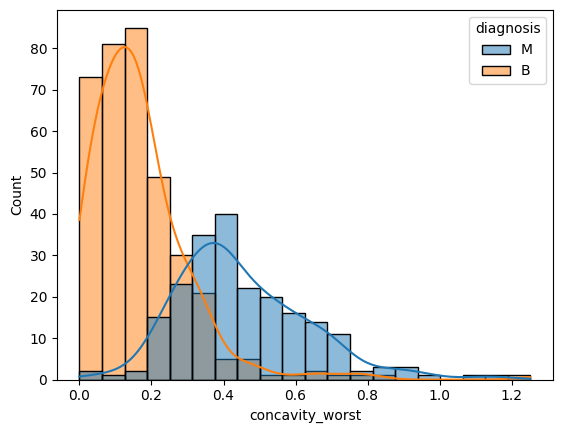

In [102]:
# Histogram with density curve
sns.histplot(data=df, x='concavity_worst', hue='diagnosis', kde=True)
plt.show()

**Carefully Inspection of every single distribution:**

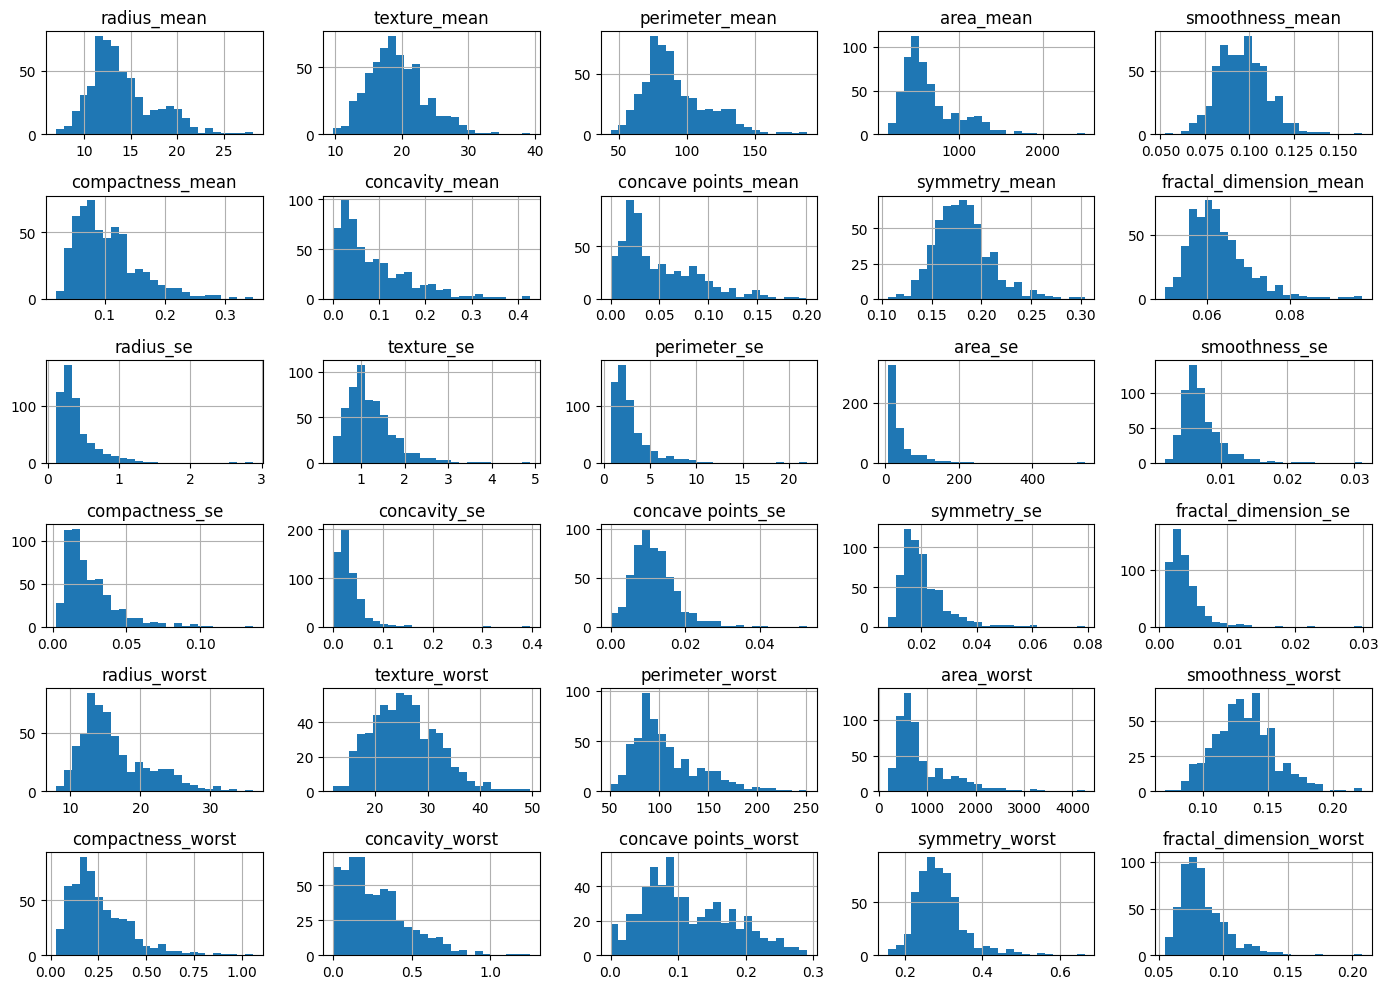

In [28]:
df.hist(bins=25, figsize=(14, 10))
plt.tight_layout()
plt.show()

## Bi-variate Analysis

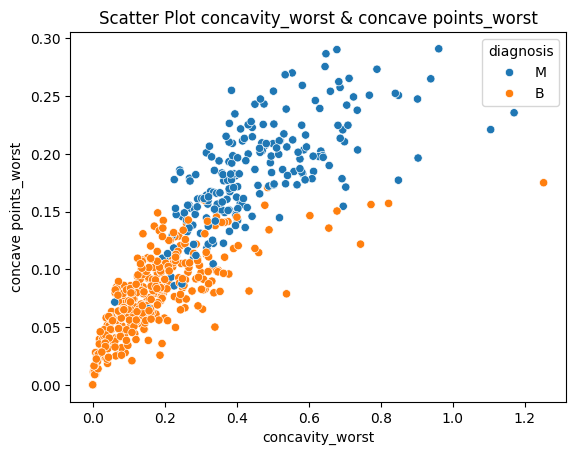

In [89]:
sns.scatterplot(x='concavity_worst', y='concave points_worst', hue='diagnosis', data=df)
plt.title('Scatter Plot concavity_worst & concave points_worst')
plt.show()

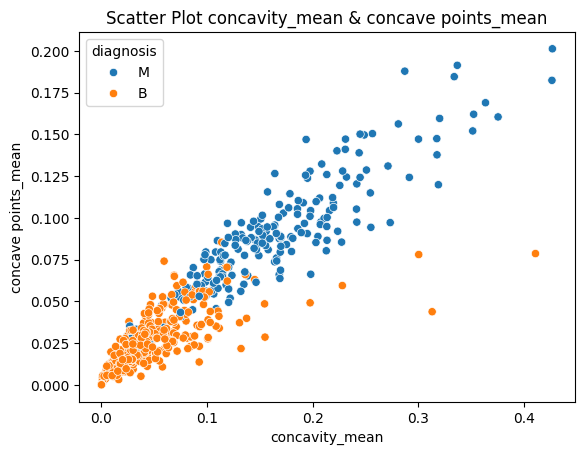

In [88]:
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df)
plt.title('Scatter Plot concavity_mean & concave points_mean')
plt.show()

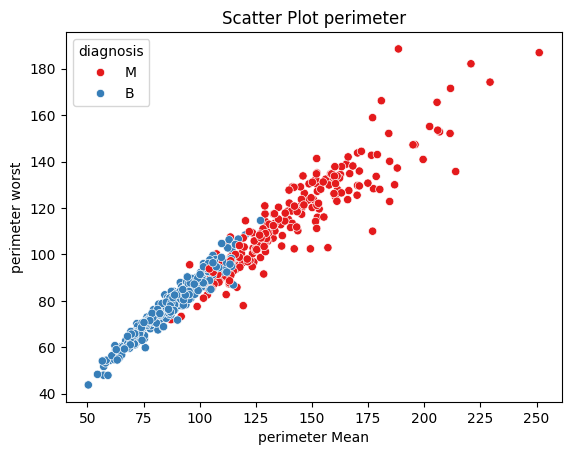

In [87]:
sns.scatterplot(x='perimeter_worst', y='perimeter_mean', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('perimeter Mean')
plt.ylabel('perimeter worst')
plt.title('Scatter Plot perimeter')
plt.show()

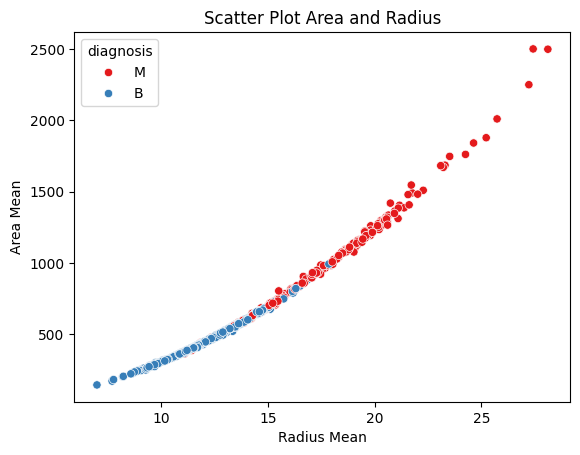

In [86]:
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot Area and Radius')
plt.show()

## Multi-variate Analysis

### **Correlation Matrix with Filtering**

In [54]:
corr_matrix = df.corr(numeric_only=True,method='pearson')

In [122]:
corr_matrix = corr_matrix[corr_matrix > 0.85]  # Adjust the threshold as needed


**Notice: we have many high correlated features:**

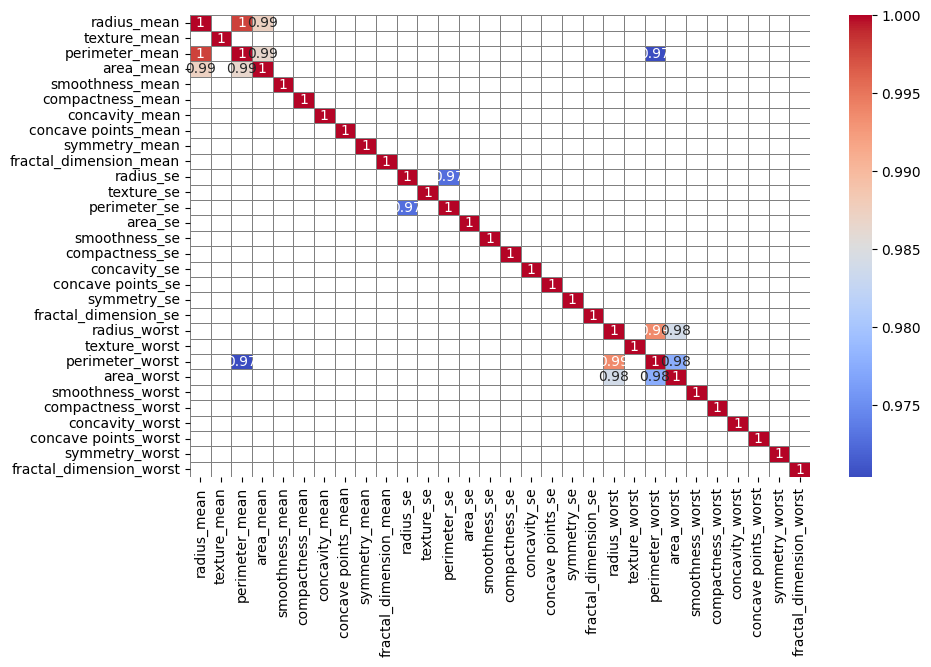

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=.5, linecolor='gray')
plt.show()

**VERY HIGH correlations:**

* radius mean & area_mean & perimeter mean
* perimeter mean & perimeter worst & radius worst & area_worst

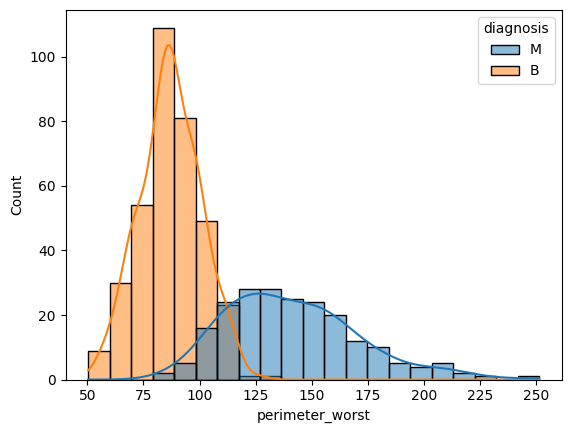

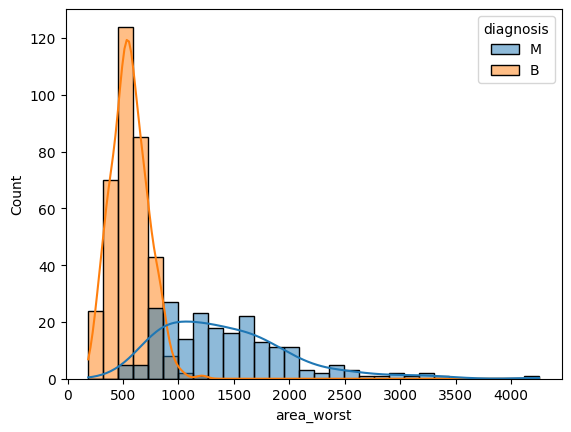

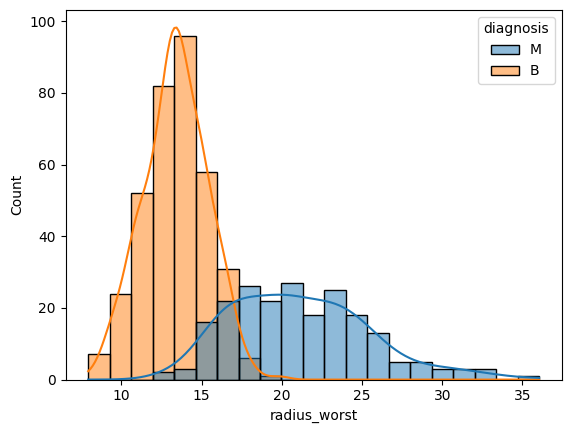

In [113]:
# Histogram with density curve
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_worst', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_worst', hue='diagnosis', kde=True)
plt.show()

**Combining the three columns by adding them**

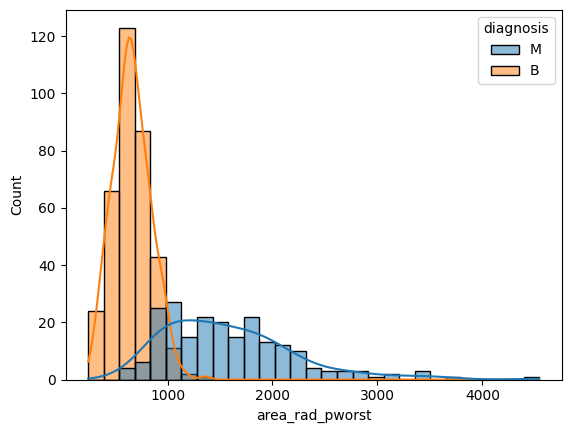

In [116]:
sns.histplot(data=df, x='area_rad_pworst', hue='diagnosis', kde=True)
plt.show()

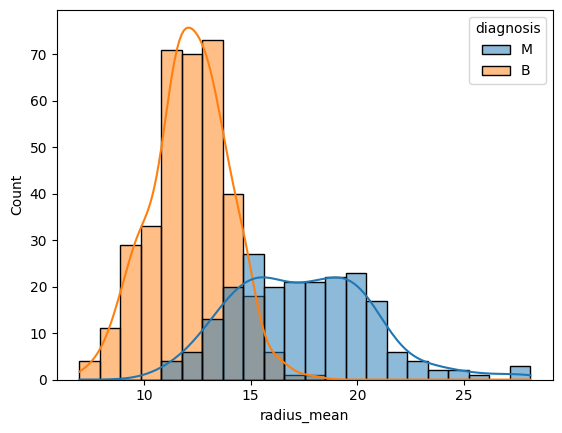

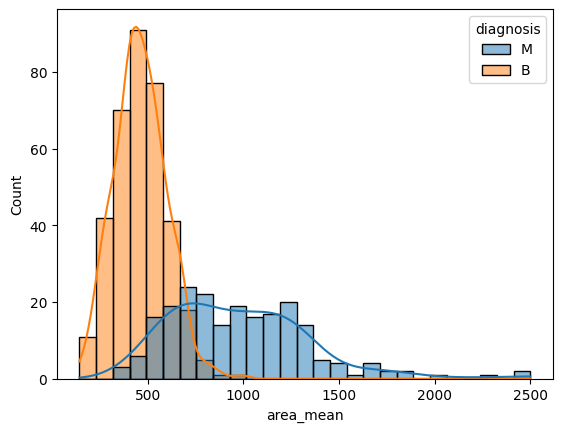

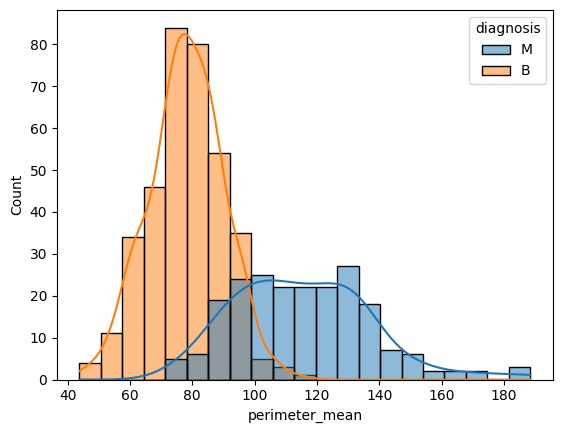

In [108]:
# Histogram with density curve
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', kde=True)
plt.show()

**Combining the three columns by adding them**

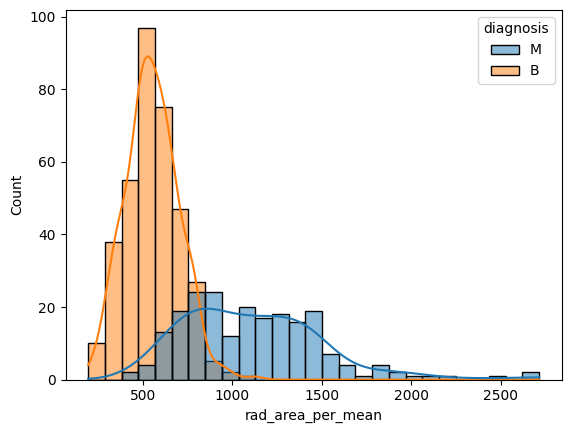

In [110]:
# Histogram with density curve
sns.histplot(data=df, x='rad_area_per_mean', hue='diagnosis', kde=True)
plt.show()

**Note: High correlated Features**

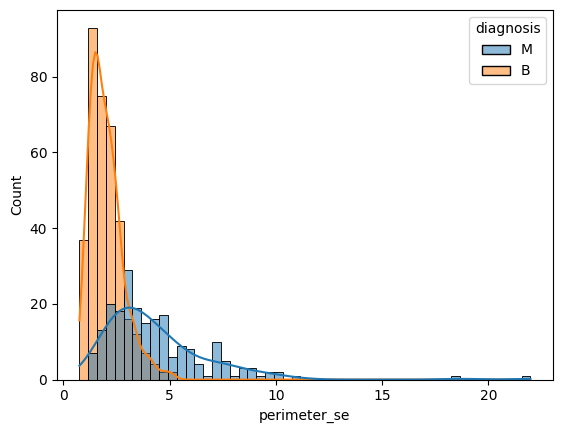

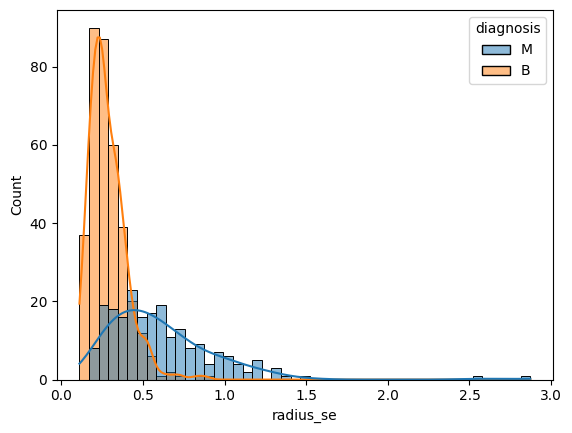

In [126]:
sns.histplot(data=df, x='perimeter_se', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_se', hue='diagnosis', kde=True)
plt.show()

                      feature           VIF
0                texture_mean    255.919911
1             smoothness_mean    370.480743
2            compactness_mean    122.868102
3              concavity_mean    132.782558
4         concave points_mean    135.233134
5               symmetry_mean    183.740312
6      fractal_dimension_mean    814.737222
7                  texture_se     24.829144
8               smoothness_se     25.806158
9              compactness_se     49.547018
10          concave points_se     46.556129
11                symmetry_se     38.469478
12              texture_worst    352.792912
13           smoothness_worst    379.199472
14          compactness_worst    133.978030
15            concavity_worst     82.659992
16       concave points_worst    142.055913
17             symmetry_worst    223.015598
18    fractal_dimension_worst    527.439038
19      LOG_rad_area_per_mean  17500.929703
20        LOG_area_rad_pworst  23792.093391
21             LOG_rad_per_se   

# Data Cleaning

In [173]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [90]:
# Checking for missing values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [91]:
# Checking for duplicates:
df.duplicated().sum()

0

In [100]:
# Checking for outliers:
def detect_outliers_iqr(df, columns):
  Q1 = df[columns].quantile(0.20)
  Q3 = df[columns].quantile(0.80)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
  return outliers

In [101]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, numerical_columns)
print("Outliers using IQR:\n", outliers_iqr.sum())

Outliers using IQR:
 101


**We will keep the outliers until model evaluation**

# Feature Engineering

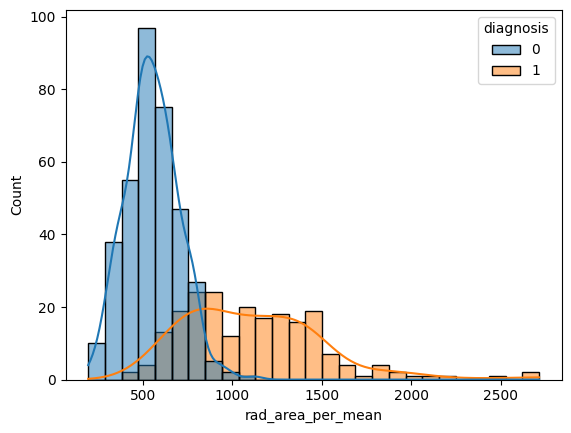

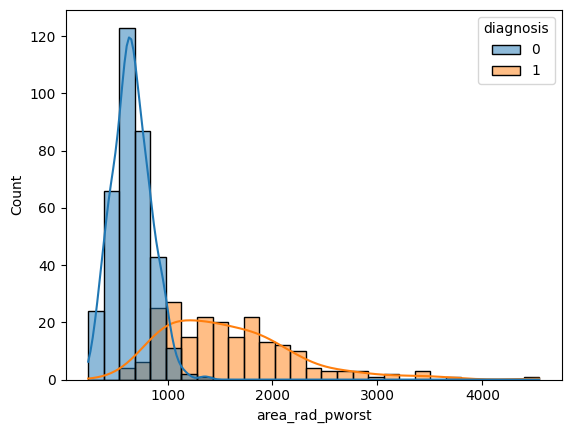

In [346]:
df['rad_area_per_mean'] = df['radius_mean'] + df['area_mean'] + df['perimeter_mean']
df['area_rad_pworst'] = df['perimeter_worst'] + df['area_worst'] + df['radius_worst']
sns.histplot(data=df, x='rad_area_per_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_rad_pworst', hue='diagnosis', kde=True)
plt.show()

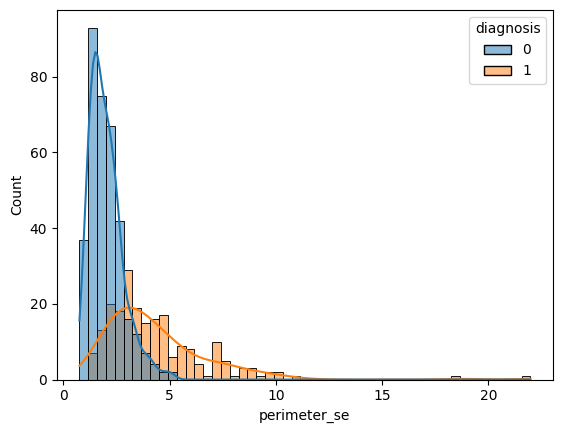

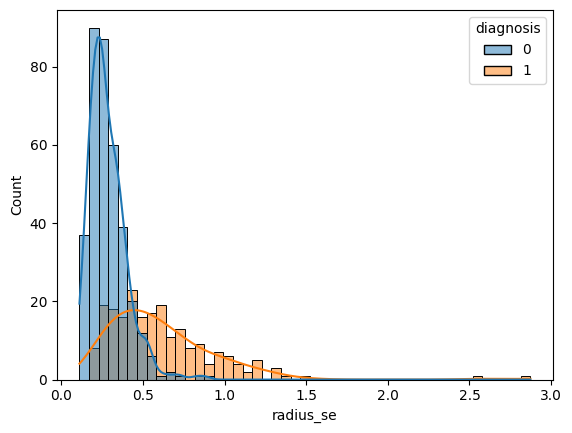

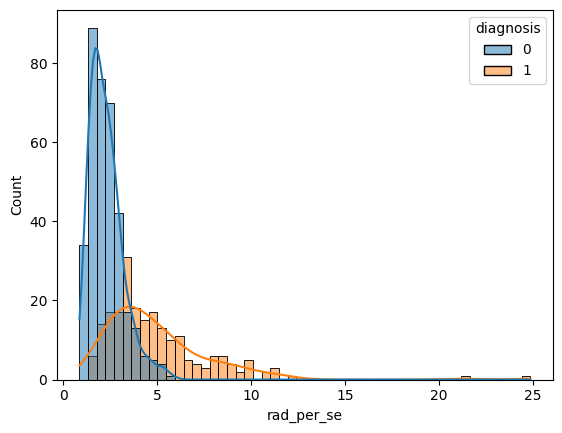

In [347]:
sns.histplot(data=df, x='perimeter_se', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_se', hue='diagnosis', kde=True)
plt.show()
df['rad_per_se'] = df['radius_se'] + df['perimeter_se']
sns.histplot(data=df, x='rad_per_se', hue='diagnosis', kde=True)
plt.show()

**At first, I will try to handle the skewed data distributions**

## **Log Transformation**

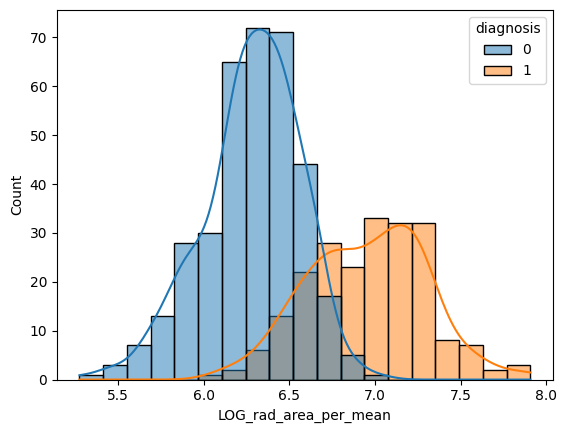

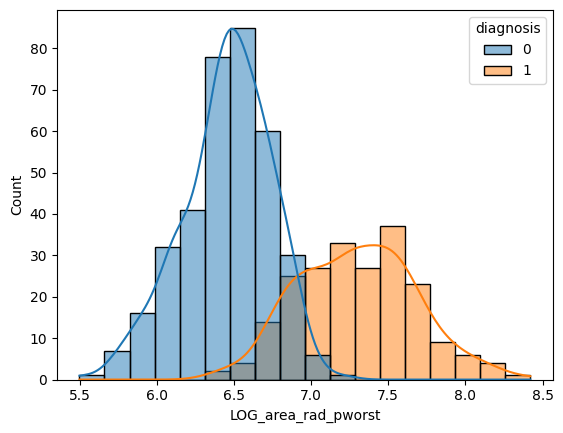

In [348]:
df['LOG_rad_area_per_mean'] = np.log1p(df['rad_area_per_mean'])  # Add 1 to avoid log(0) errors

df['LOG_area_rad_pworst'] = np.log1p(df['area_rad_pworst'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_area_per_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='LOG_area_rad_pworst', hue='diagnosis', kde=True)
plt.show()


**Notice : it is much better distribution closer to normal distribution to feed the model**

Now we will drop ⁉
* **to drop** : df['radius_mean'] & df['area_mean'] & df['perimeter_mean'] & df['rad_area_per_mean']

* **to keep** : df['LOG_rad_area_per_mean']

* **to drop** : df['perimeter_worst'] & df['area_worst'] & df['radius_worst'] & df['area_rad_pworst']
* **to keep** : df['LOG_area_rad_pworst']

In [349]:
df.drop(['radius_mean', 'area_mean', 'perimeter_mean', 'rad_area_per_mean'], axis=1, inplace=True)
df.drop(['perimeter_worst', 'area_worst', 'radius_worst', 'area_rad_pworst'], axis=1, inplace=True)

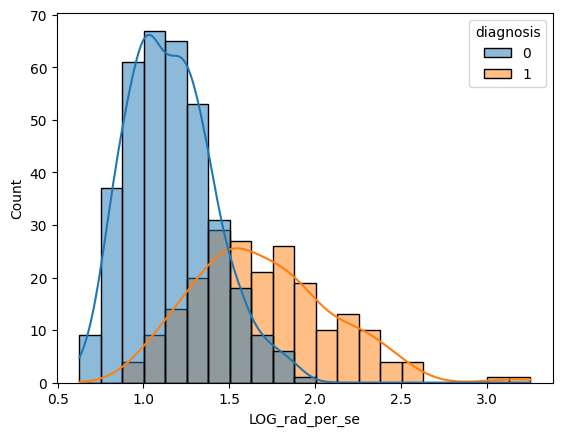

In [350]:
df['LOG_rad_per_se'] = np.log1p(df['rad_per_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_per_se', hue='diagnosis', kde=True)
plt.show()

In [351]:
df.drop(['radius_se','rad_per_se','perimeter_se'], axis=1, inplace=True)

**More Features Skewness:**

In [352]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'LOG_rad_area_per_mean',
       'LOG_area_rad_pworst', 'LOG_rad_per_se'],
      dtype='object')

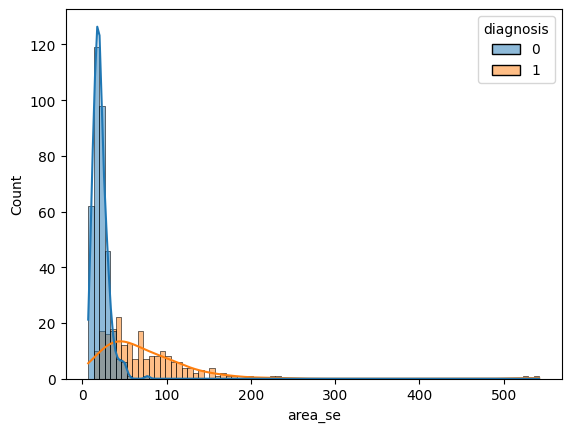

In [353]:
sns.histplot(data=df, x='area_se', hue='diagnosis', kde=True)
plt.show()

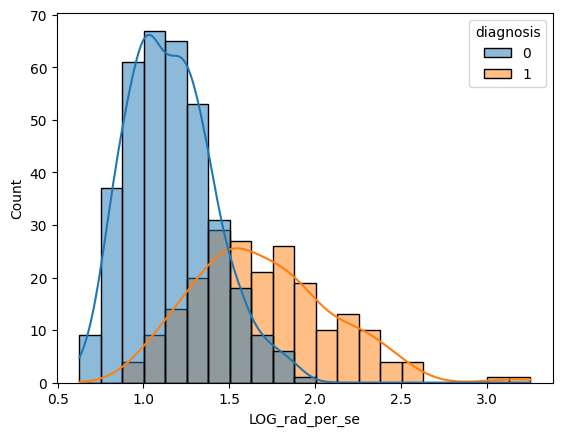

In [354]:
df['LOG_area_se'] = np.log1p(df['area_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_per_se', hue='diagnosis', kde=True)
plt.show()

In [355]:
df.drop(['area_se'], axis=1, inplace=True)

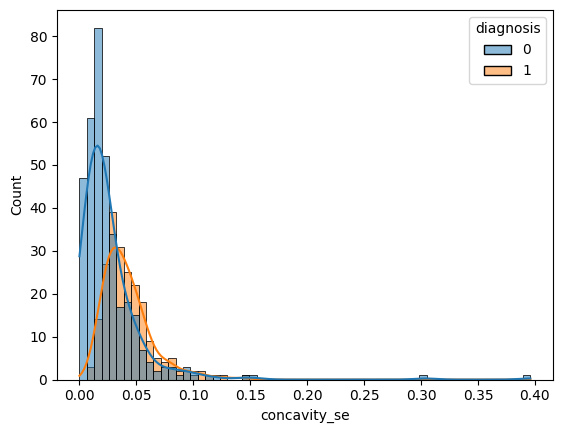

In [356]:
sns.histplot(data=df, x='concavity_se', hue='diagnosis', kde=True)
plt.show()

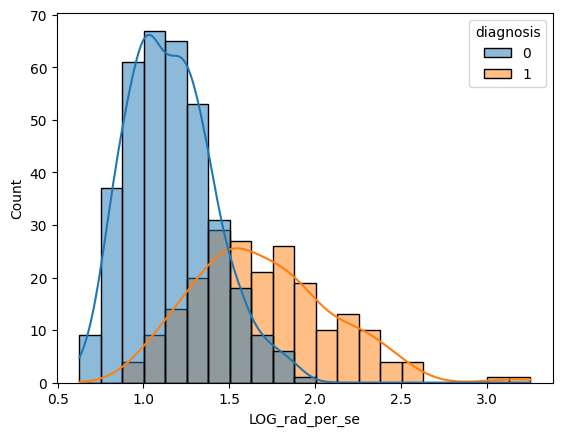

In [357]:
df['LOG_concavity_se'] = np.log1p(df['concavity_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_per_se', hue='diagnosis', kde=True)
plt.show()

In [358]:
df.drop(['concavity_se'], axis=1, inplace=True)

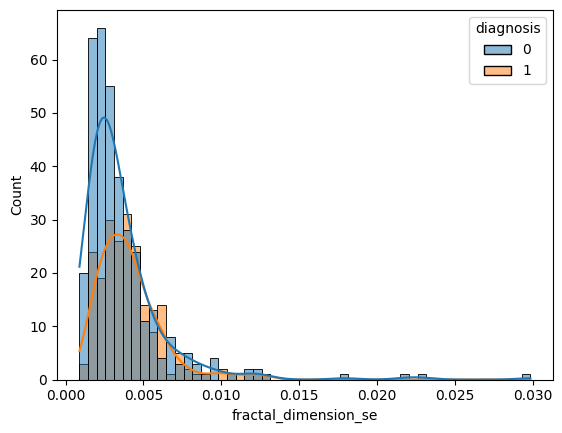

In [359]:
sns.histplot(data=df, x='fractal_dimension_se', hue='diagnosis', kde=True)
plt.show()

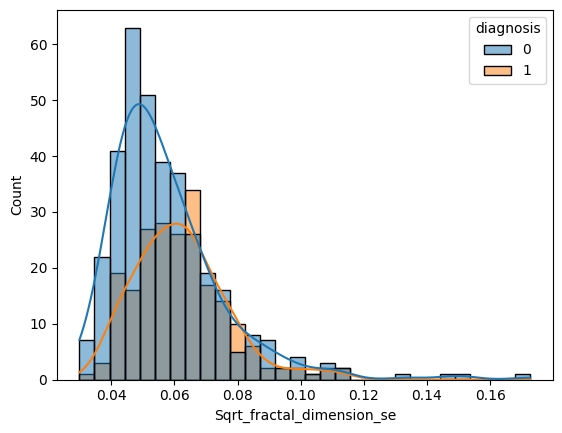

In [360]:
df['Sqrt_fractal_dimension_se'] = np.sqrt(df['fractal_dimension_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='Sqrt_fractal_dimension_se', hue='diagnosis', kde=True)
plt.show()

In [361]:
df.drop(['fractal_dimension_se'], axis=1, inplace=True)

# Data Pre Processing

In [286]:
df.diagnosis.value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


**The data is slightly imbalanced**

In [344]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


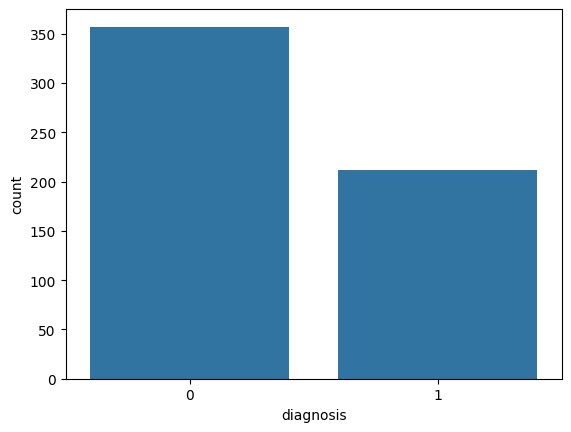

In [307]:
sns.countplot(data=df, x='diagnosis')
plt.show()

In [308]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [309]:
scaler = RobustScaler(quantile_range=(20, 80))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Multicollinearity: Variance Inflation Factor


Imagine you're trying to measure the height of a building.

* One way: You use a tape measure directly to measure the height.
* Another way: You measure the length of the shadow and the angle of the sun, then use trigonometry to calculate the height.

If the sun is directly overhead (no angle), measuring the shadow is **useless**. It won't give you any additional information about the height. **This is similar to multicollinearity in statistics.**

**Calculate the Variance Inflation Factor for each variable.**


In [364]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df.drop('diagnosis', axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                      feature           VIF
0                texture_mean    255.919911
1             smoothness_mean    370.480743
2            compactness_mean    122.868102
3              concavity_mean    132.782558
4         concave points_mean    135.233134
5               symmetry_mean    183.740312
6      fractal_dimension_mean    814.737222
7                  texture_se     24.829144
8               smoothness_se     25.806158
9              compactness_se     49.547018
10          concave points_se     46.556129
11                symmetry_se     38.469478
12              texture_worst    352.792912
13           smoothness_worst    379.199472
14          compactness_worst    133.978030
15            concavity_worst     82.659992
16       concave points_worst    142.055913
17             symmetry_worst    223.015598
18    fractal_dimension_worst    527.439038
19      LOG_rad_area_per_mean  17500.929703
20        LOG_area_rad_pworst  23792.093391
21             LOG_rad_per_se   

**Interpreting VIF**

* VIF = 1: No correlation between the predictor and other predictors.

* VIF between 1 and 5: Moderate correlation, generally acceptable.

* VIF greater than 5: High correlation, indicating potential multicollinearity.

So, VIF helps identify variables that are essentially redundant in a model due to high correlation with other variables.

**Addressing High VIF**

* Feature Removal: Remove one of the highly correlated variables.
* Feature Combination: Combine highly correlated variables into a new feature.
* Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be used.

**Remember: High VIF indicates potential issues, but it doesn't necessarily mean the model is unusable. It's essential to consider other factors like model performance and interpretability when making decisions.**

## Addressing High VIF : Dimensionality Reduction PCA

In [365]:
from sklearn.decomposition import PCA


**Choose the number of components: Select the number of components that captures a sufficient amount of variance (e.g., 95%).**

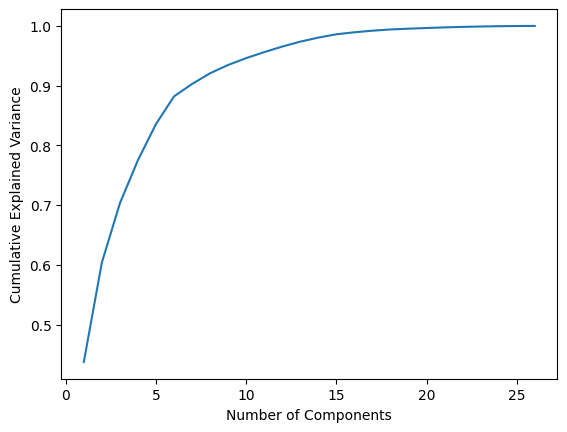

In [366]:

# Sample data
data = df.drop('diagnosis', axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


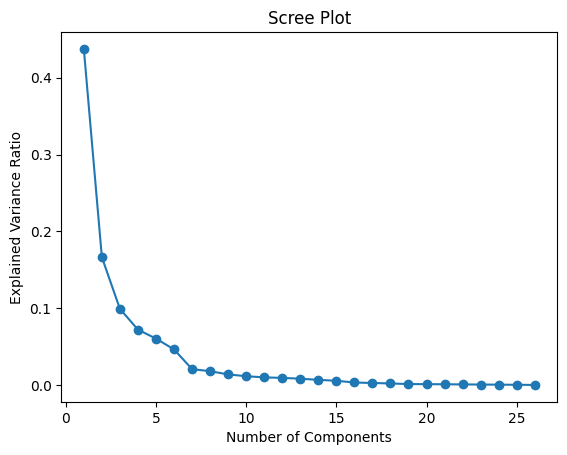

In [367]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [372]:
# Sample data
data = df.drop('diagnosis', axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Create a PCA object
pca = PCA(n_components=10)  # Specify the number of components

# Fit the PCA model to the data
pca.fit(data_scaled)

# Transform the data to the new dimension
principal_components = pca.transform(data_scaled)

# Create column names based on principal components
column_names = [f'PC{i+1}' for i in range(pca.n_components_)]  # Dynamic naming

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=column_names)

(principal_df)



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,8.446862,0.956996,-2.219668,-2.833424,-1.427513,1.415788,-1.790048,-0.304603,0.745683,0.276478
1,0.789534,-3.092441,-0.201778,-1.348543,0.042739,-0.058371,-0.532846,-0.793680,-0.661991,0.988415
2,4.905759,-1.771276,-0.307210,-1.125377,-0.600414,0.440175,0.194701,-0.122221,-0.408203,-0.371305
3,10.077321,7.161456,-3.998211,1.732481,-2.298046,3.147533,-0.710748,-1.585560,1.557279,-0.725674
4,2.755132,-1.492201,1.117795,-3.342802,-0.511529,-1.416356,0.481006,-0.764014,-0.233090,0.535580
...,...,...,...,...,...,...,...,...,...,...
564,4.195609,-3.179351,2.274168,-1.793484,-0.471956,-2.485163,0.540457,0.310708,-0.607227,0.043723
565,2.288195,-3.603964,3.017680,1.675476,-0.469202,-0.313137,-0.145031,1.077618,0.237666,0.292435
566,1.068449,-2.451524,1.513741,1.096013,1.876969,-0.518013,0.239702,-0.543314,-0.747557,-0.145544
567,9.887111,-0.307136,-0.946338,2.186939,0.660021,0.656402,-0.440891,0.498591,0.242228,-1.120522


## Evaluating Model With PCA data

In [373]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)

In [374]:
log_reg_pca = LogisticRegression(C= 1, max_iter= 1000, penalty= 'l2', solver= 'liblinear')
log_reg_pca.fit(x_train, y_train)
predcs_pca = log_reg_pca.predict(x_test)
print(classification_report(y_test, predcs_pca))
print("\n")
print('f1_score ',f1_score(y_test, predcs_pca))
print('accuracy_score ',accuracy_score(y_test, predcs_pca))
print("\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



f1_score  0.988235294117647
accuracy_score  0.9912280701754386




**_ ___  ___ __ ____ __ ___ ___ ____ _______ ___Same results___ ____ ____ ______ ____ _____ ___ ________ __ ________**

# Model Selection

In [205]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [215]:
models = list()
models.append(("LR" , LogisticRegression(random_state=79) ))
models.append(("DT" , DecisionTreeClassifier(random_state=79)))
models.append(("KNN" , KNeighborsClassifier(n_neighbors=11)))
models.append(("RF" , RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(("xg" , XGBClassifier(random_state=79)))
models.append(("GB" , GradientBoostingClassifier(random_state=79)))

In [310]:
for item in models:
  model = item[1]
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  print(item[0], classification_report(y_test, preds))
  print("\n")
  print('f1_score ',f1_score(y_test, preds))
  print('accuracy_score ',accuracy_score(y_test, preds))
  print("\n")



LR               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



f1_score  0.9767441860465116
accuracy_score  0.9824561403508771


DT               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



f1_score  0.9069767441860465
accuracy_score  0.9298245614035088


KNN               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                        

# Hyper Parameters Tuning

In [313]:
# Define the parameter grid
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [.01, 0.1, 1, 5, 10],
    'solver' : ['liblinear','saga'],
    'max_iter' : [10000]
    }
]

# Create the logistic regression model
logistic_regression = LogisticRegression(max_iter=10000)

# Create the grid search object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy' )

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)


{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
0.9802197802197803


# Final Result

In [324]:
log_reg = LogisticRegression(C= 1, max_iter= 1000, penalty= 'l2', solver= 'liblinear')
log_reg.fit(x_train, y_train)
predcs = log_reg.predict(x_test)
print(classification_report(y_test, predcs))
print("\n")
print('f1_score ',f1_score(y_test, predcs))
print('accuracy_score ',accuracy_score(y_test, predcs))
print("\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



f1_score  0.988235294117647
accuracy_score  0.9912280701754386


